<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/12_3_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l==1.0.0-alpha1.post0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.6 MB/s eta 0:00:00


## 12.3 Gradient Descent

### 12.3.1 One-Dimensional Gradient Descent

In [2]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

In [3]:
def f(x):       # Objective function
  return x **2

def f_grad(x):  # Gradient (derivative) of the objective function
  return 2 * x

In [4]:
def gd(eta, f_grad):
  x = 10.0
  results = [x]
  for i in range(10):
    x -= eta * f_grad(x)
    results.append(float(x))
  print(f'epoch 10, x: {x:f}')
  return results

results = gd(0.2, f_grad)
results

epoch 10, x: 0.060466


[10.0,
 6.0,
 3.5999999999999996,
 2.1599999999999997,
 1.2959999999999998,
 0.7775999999999998,
 0.46655999999999986,
 0.2799359999999999,
 0.16796159999999993,
 0.10077695999999996,
 0.06046617599999997]

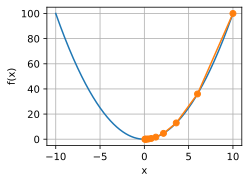

In [5]:
def show_trace(results, f):
  n = max(abs(min(results)), abs(max(results)))
  f_line = torch.arange(-n, n, 0.01)
  d2l.set_figsize()
  d2l.plot([f_line, results], [[f(x) for x in f_line],
                               [f(x) for x in results]], 'x', 'f(x)', 
           fmts=['-', '-o'])
  
show_trace(results, f)

#### Learning Rate

epoch 10, x: 3.486784


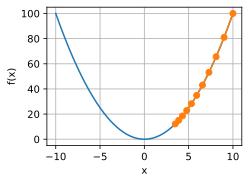

In [6]:
show_trace(gd(0.05, f_grad), f)

epoch 10, x: 61.917364


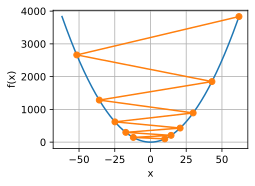

In [7]:
show_trace(gd(1.1, f_grad), f)

#### Local Minima

In [8]:
c = torch.tensor(0.15 * np.pi)

def f(x):   # Objective function
  return x * torch.cos(c * x)

def f_grad(x): # Gradient of the objective function
  return torch.cos(c * x) - c * x * torch.sin(c * x)

epoch 10, x: -1.528166


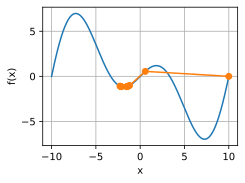

In [ ]:
show_trace(gd(2, f_grad), f)

### 12.3.2 Multivariate Gradient Descent

In [9]:
def train_2d(trainer, steps=28, f_grad=None):
  x1, x2, s1, s2 = -5, -2, 0, 0
  results = [(x1, x2)]
  for i in range(steps):
    if f_grad:
      x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
    else:
      x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
    results.append((x1, x2))
  print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2): f}')
  return results

In [10]:
def show_trace_2d(f, results):
  d2l.set_figsize()
  d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
  x1, x2 = torch.meshgrid(torch.arange(-5.5,1.0, 0.1),
                          torch.arange(-3.0, 1.0, 0.1))
  d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
  d2l.plt.xlabel('x1')
  d2l.plt.ylabel('x2')

epoch 28, x1: -0.009671, x2: -0.000001


/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


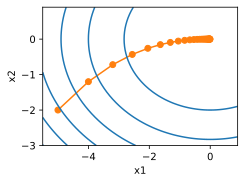

In [11]:
def f_2d(x1, x2):
  return x1 **2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):
  return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
  g1, g2 = f_grad(x1, x2)
  return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))